#Introduction
Principal components analysis (PCA) is a technique to discover the way in which numeric variables covary. PCA is a unsupervised learning method that extract meaning from data without training a model on labeled data.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more information it has.

PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them.

An important thing to realize, principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

In this post, we'll go step by step into implementing Principal Component Analysis (PCA) using the Iris dataset. The steps involved are as follows:


** 1- Normalize the data **
Standardize the dataset to ensure each feature has a mean of 0 and a standard deviation of 1.

**2- Calculate the covariance matrix X of data points. **

Covariance  is a square matrix giving the covariance between each pair of elements of a given random vector.

For a multi dimentional matrix covariance is:

Cov = | Var(x₁)  cov(x₁, x₂)  cov(x₁, x₃)  ...  cov(x₁, xₙ) |
      | cov(x₂, x₁)  Var(x₂)  cov(x₂, x₃)  ...  cov(x₂, xₙ) |
      | cov(x₃, x₁)  cov(x₃, x₂)  Var(x₃)  ...  cov(x₃, xₙ) |
      |  ...   ...   ...  ...  ...   |
      | cov(xₙ, x₁)  cov(xₙ, x₂)  cov(xₙ, x₃)  ...  Var(xₙ)  |



**3- Calculate eigen vectors and corresponding eigen values.**

Mathematically, the eigenvalue-eigenvector equation for a matrix is represented as:

Σ v = λ v

where:

Σ is the covariance matrix.

v represents an eigenvector.

λ denotes the corresponding eigenvalue.

In this code we will use np.linalg.eig(Sigma) to call the eig function from NumPy's linear algebra module.


**4- Sort the eigen vectors according to their eigen values in decreasing order.**

We order the eigenvalues from largest to smallest so that it gives us the components in order or significance. Here comes the dimensionality reduction part. If we have a dataset with n variables, then we have the corresponding n eigenvalues and eigenvectors. It turns out that the eigenvector corresponding to the highest eigenvalue is the principal component of the dataset and it is our call as to how many eigenvalues we choose to proceed our analysis with.


**5 - Choose the bigger eigenvalues.**

To reduce dimensionality, we select the first p principal components, corresponding to the p largest eigenvalues. While this discards some information, the loss is minimized if the omitted eigenvalues are relatively small.

To gain a clearer understanding of the transformed data, we'll create visualizations of the first two and three principal components.



## References
https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

# Code

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Load the data

In [5]:
iris = load_iris()
x = iris.data.astype(np.float32)  # Features
y = iris.target.reshape(-1, 1).astype(np.float32)  # Target variable (reshaped for consistency)

Calculate mean and standar desviation for each feature of the data set.

In [6]:
mean = x.mean(axis=0)
std = x.std(axis=0)

print(mean, std)

[5.8433347 3.0573332 3.7580001 1.1993335] [0.82530105 0.434411   1.7594048  0.7596927 ]


Standardizes the dataset, making each feature have a mean of 0 and a standard deviation of 1.

In [7]:
# normalize features
normalize_x = (x-mean) / std

Covariance Matrix Calculation.

In [8]:
# calculates the covariance matrix of the standardized data.
m = len(normalize_x)
Sigma = (1/m) * np.dot(normalize_x.T, normalize_x) # sigma^2

Singular Value Decomposition (SVD) of Covariance Matrix

In [9]:
# Factorize the covariance matrix - SVD

#computes the eigenvalues and eigenvectors of the covariance matrix.
eigen_vals, eigen_vecs = np.linalg.eig(Sigma)

#sorts the eigenvalues in descending order and gets the corresponding indices.
idx = np.argsort(eigen_vals, axis=0)[::-1]

#sorts the eigenvectors according to the sorted eigenvalues.
sorted_eig_vectors = eigen_vecs[:, idx]

bar plot that shows the individual explained variances for each principal component.

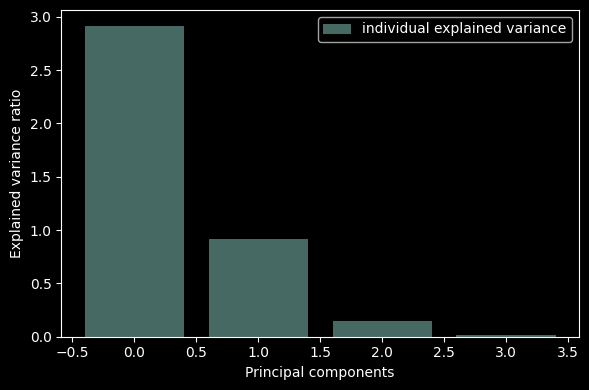

In [10]:
# plot
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
# #
    plt.bar(range(4), eigen_vals, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


# Project x onto PC space
X_pca = np.dot(normalize_x, sorted_eig_vectors[:, :2])

Now, lets visualize the first two principal components and the total variance they capture.


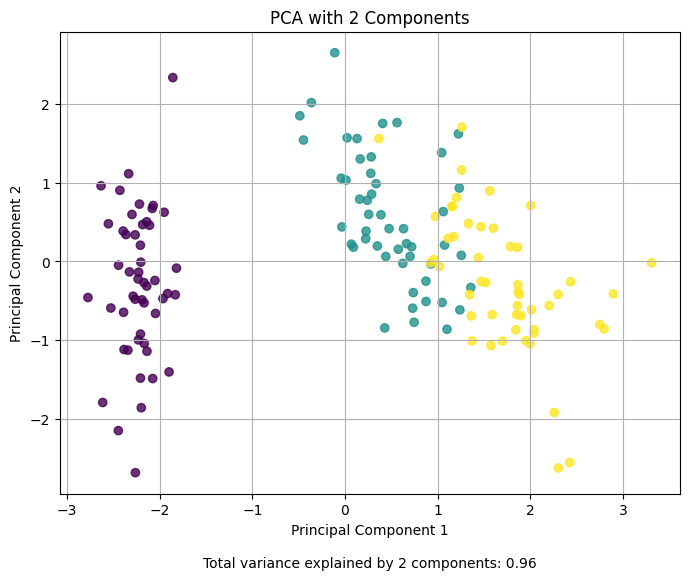

In [16]:
# Project x onto PC space for 2 components
X_pca_2 = np.dot(normalize_x, sorted_eig_vectors[:, :2])

# Plotting for 2 components

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.title('PCA with 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

# Calculate variance explained by the selected components
variance_explained = np.sum(eigen_vals[:2]) / np.sum(eigen_vals)
plt.text(0.5, -0.15, f'Total variance explained by 2 components: {variance_explained:.2f}',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

plt.show()

Now, a 3D scatter plot of the data projected onto the first three pincipal components.

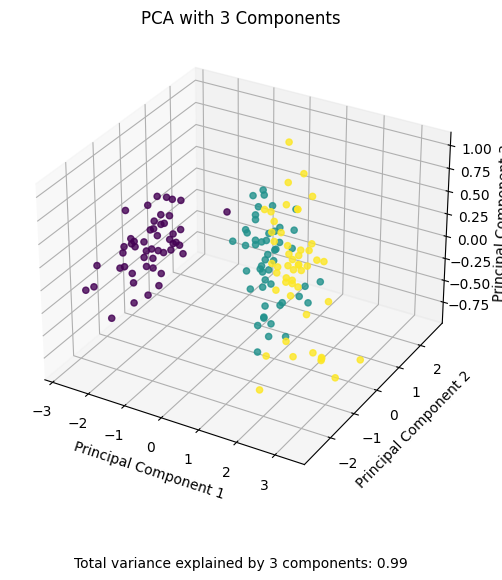

In [18]:
# Project x onto PC space for 3 components
X_pca_3 = np.dot(normalize_x, sorted_eig_vectors[:, :3])

# Plotting for 3 components

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],c=y, cmap='viridis', alpha=0.8)
ax.set_title('PCA with 3 Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Calculate variance explained by the selected components
variance_explained_3 = np.sum(eigen_vals[:3]) / np.sum(eigen_vals)
ax.text2D(0.5, -0.15, f'Total variance explained by 3 components: {variance_explained_3:.2f}',
              horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=10)

plt.show()